# **Unsupervised Learning - Wine Dataset**

### Importing necessary libraries

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [285]:
data = pd.read_csv('Wine.csv')

## Exploration

In [286]:
data.isna().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [288]:
data.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


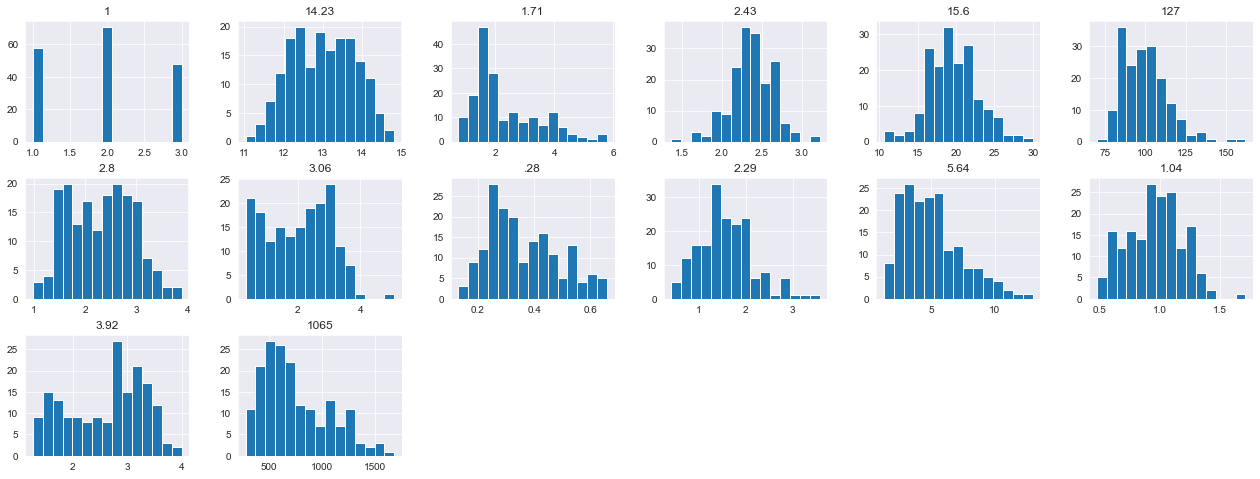

In [289]:
data[data.columns].hist(bins=15, figsize=(22, 8), layout=(3,6));

Text(0.5, 1.0, 'Correlation Heatmap')

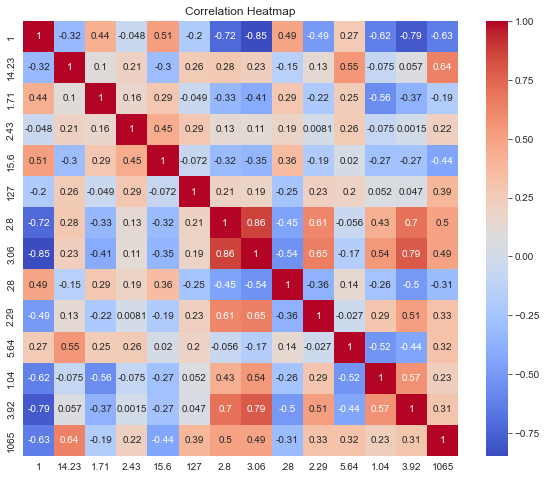

In [290]:
correlation_matrix = data[data.columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

## Standardization the feature matrix

In [291]:
X = StandardScaler().fit_transform(X)

X
# We standardize the feature matrix 'X' to normalize the data within a particular range.
# This also helps in speeding up the calculations in an algorithm.

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

# Dimensionality Reduction with T-SNE

In [292]:
from sklearn.manifold import TSNE

In [293]:
tsne = TSNE(n_components=3)
principalComponents = tsne.fit_transform(X)
# PCA is a technique used to emphasize variation and bring out strong patterns in a dataset.
# We use it here to reduce the dimensionality of the data.

In [294]:
df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
# We create a new DataFrame that will have the principal component values for all the samples.

In [295]:
df.head

<bound method NDFrame.head of      principal component 1  principal component 2  principal component 3
0                55.734509              19.084692              12.478255
1                42.286781              42.582535             -31.257401
2                62.830849              12.774988             -51.623539
3                 9.508088              19.733612             -24.830406
4                71.188484              20.153225             -39.493034
..                     ...                    ...                    ...
172             -59.997345              -0.201137             -21.260456
173             -64.820900             -20.672112              -1.617384
174             -68.705070              -3.851943              19.974915
175             -80.766708              -2.399193              13.852874
176             -79.457954             -17.813179              -8.672594

[177 rows x 3 columns]>

# Step 6: Apply K-Means

In [296]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
# K-means is a type of partitioning clustering, that is, it divides the data into k non-overlapping subsets (or clusters)
# without any cluster-internal structure or labels. This means, it's an unsupervised algorithm.


c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Step 7: Add the labels to the dataframe

In [297]:
df['labels'] = kmeans.labels_
# We add the K-means clustering labels to our DataFrame.

In [298]:
df.tail()

,principal component 1,principal component 2,principal component 3,labels
172,-59.997345,-0.201137,-21.260456,0
173,-64.820900,-20.672112,-1.617384,0
174,-68.705070,-3.851943,19.974915,0
175,-80.766708,-2.399193,13.852874,0
176,-79.457954,-17.813179,-8.672594,0


# Visualization of clusters

In [299]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

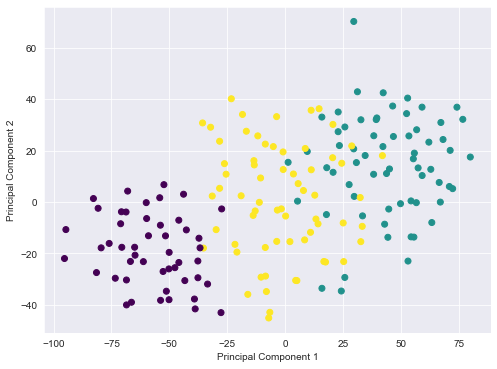

In [300]:
plt.figure(figsize=(8,6))
plt.scatter(df['principal component 1'], df['principal component 2'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# We create a scatter plot of the two principal components and color it according to the K-Means cluster assignments.


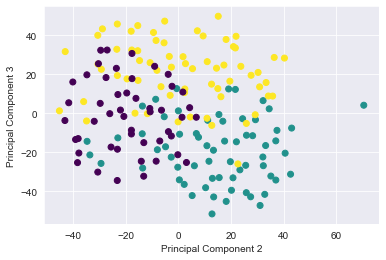

In [301]:
plt.scatter(df['principal component 2'], df['principal component 3'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

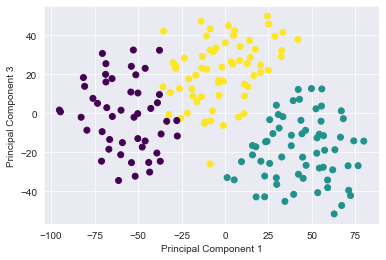

In [302]:
plt.scatter(df['principal component 1'], df['principal component 3'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

# 3D Visualization of clusters

Text(0.5, 0, 'Principal Component 3')

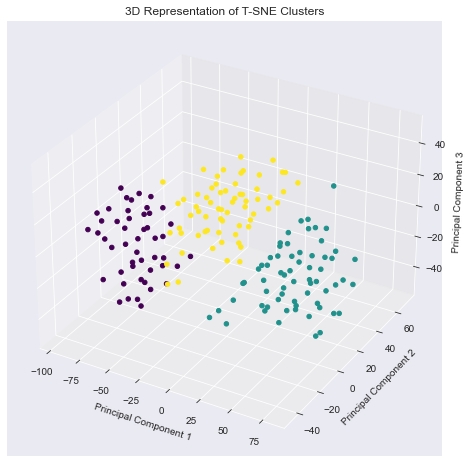

In [303]:
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')
plt.title('3D Representation of T-SNE Clusters')
plot_axes.scatter3D(df['principal component 1'],df['principal component 2'], df['principal component 3'],c=kmeans.labels_,depthshade=False,cmap='viridis')
plot_axes.set_xlabel('Principal Component 1')
plot_axes.set_ylabel('Principal Component 2')
plot_axes.set_zlabel('Principal Component 3')

## Determining optimal number of clusters using the elbow method

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

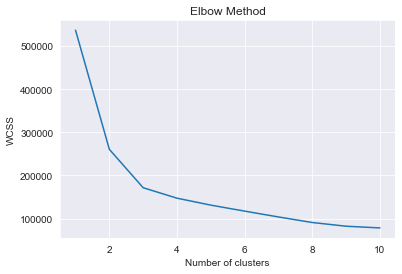

In [304]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we're using the elbow method to determine the optimal number of clusters.
# We run a loop to fit multiple k-means models and in each successive model,
# we increase the number of clusters. We record the sum of squared distances (WCSS) and plot it to observe 'The elbow'.

## Inertia decreases from 3 to 4 very slowly , so 3 was a good choice. 4 or 5 works fine too